In [1]:
import pandas as pd
import numpy as np
import scipy.io as sp
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

In [2]:
#Chargement du fichier
excel_file = pd.ExcelFile('Dataframe_2_splits_collee.xlsx') 
df_from_excel = excel_file.parse('Sheet1') 
display(df_from_excel)

,Unnamed: 0,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
0,1,1,1,0.01,1,0.000,0.0,0.000,0.649,0.500,1
1,2,1,1,0.01,2,0.000,0.0,0.000,0.649,0.500,1
2,3,1,1,0.01,3,0.000,0.0,0.000,0.649,0.500,1
3,4,1,1,0.01,4,0.000,0.0,0.000,0.649,0.500,1
4,5,1,1,0.01,5,0.000,0.0,0.000,0.649,0.500,1
...,...,...,...,...,...,...,...,...,...,...,...
25195,25196,500,300,0.50,5,0.824,1.0,0.700,0.850,0.885,2
25196,25197,500,300,0.50,6,0.841,1.0,0.726,0.868,0.899,2
25197,25198,500,300,0.50,7,0.826,1.0,0.704,0.853,0.887,2
25198,25199,500,300,0.50,8,0.815,1.0,0.688,0.842,0.878,2


In [3]:
# retirer la colonne inutile
df_from_excel_good=df_from_excel.drop(["Unnamed: 0"], axis = 1)
display(df_from_excel_good)

,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
0,1,1,0.01,1,0.000,0.0,0.000,0.649,0.500,1
1,1,1,0.01,2,0.000,0.0,0.000,0.649,0.500,1
2,1,1,0.01,3,0.000,0.0,0.000,0.649,0.500,1
3,1,1,0.01,4,0.000,0.0,0.000,0.649,0.500,1
4,1,1,0.01,5,0.000,0.0,0.000,0.649,0.500,1
...,...,...,...,...,...,...,...,...,...,...
25195,500,300,0.50,5,0.824,1.0,0.700,0.850,0.885,2
25196,500,300,0.50,6,0.841,1.0,0.726,0.868,0.899,2
25197,500,300,0.50,7,0.826,1.0,0.704,0.853,0.887,2
25198,500,300,0.50,8,0.815,1.0,0.688,0.842,0.878,2


In [4]:
#application du filtre pour déterminer les combinaisons candidates à la best combi
filtered_values_fold = np.where((df_from_excel_good['F1 score']>=0.97))
#filtered_values_fold_2 = np.where((df_from_excel_good['F1 score']>=0.9) & (df_from_excel_good['numero fold'] == 2))
#df_best_values_fold_1 = df_from_excel_good.iloc[filtered_values_fold].sort_values(by=['AUC'], ascending=False)
df_best_values_fold = df_from_excel_good.iloc[filtered_values_fold].sort_values(by=['F1 score'], ascending=False)
display(df_best_values_fold)

,Nombre estimateurs,Max Samples,Contamination,Max Features,F1 score,recall,precision,accuracy,AUC,numero fold
17119,30,50,0.4,2,0.979,1.000,0.960,0.985,0.989,2
16745,30,20,0.4,6,0.975,0.992,0.959,0.982,0.985,2
18256,40,40,0.4,5,0.975,1.000,0.952,0.982,0.986,2
19387,50,30,0.4,2,0.975,0.992,0.959,0.982,0.985,2
14102,10,10,0.4,9,0.971,0.992,0.952,0.979,0.982,2
15735,20,40,0.4,4,0.971,0.992,0.952,0.979,0.982,2
16995,30,40,0.4,4,0.971,0.992,0.952,0.979,0.982,2
17373,30,100,0.4,4,0.971,1.000,0.944,0.979,0.984,2
17376,30,100,0.4,7,0.971,0.983,0.959,0.979,0.980,2
18131,40,30,0.4,6,0.971,1.000,0.944,0.979,0.984,2


plage_estimateur =[30, 30, 40, 50, 10, 20, 30, 30, 30, 40]
plage_samples = [50, 20, 40, 30, 10, 40, 40, 100, 100, 30]
plage_features = [2, 6, 5, 2, 9, 4, 4, 4, 7, 6]
plage_contamination = [0.4]

In [14]:
dataSet = sp.loadmat('breastw.mat')
X = dataSet['X']
y = dataSet['y']

Contamination = [0.4]
nombre_estim =[30,30,40,50,10,20,30,30,30,40]
MS=[50,20,40,30,10,40,40,100,100,30]
plage_features = [2,6,5,2,9,4,4,4,7,6]
skf = StratifiedKFold(n_splits=8) 
fold=0
for i in range(0,10) : 
        test=False
        for train_index, test_index in skf.split(X, y):
                fold=fold+1
                X_train, X_test = X[train_index,:], X[test_index,:]
                y_train, y_test = y[train_index], y[test_index]
                model = IsolationForest(contamination=Contamination[0], n_estimators=nombre_estim[i], max_samples=MS[i],max_features=plage_features[i])
                model.fit(X_train)
                y_pred=model.predict(X_test)
                y_pred[y_pred>0]=0
                y_pred[y_pred<0]=1
                F1=round(f1_score(y_test,y_pred),3)
                if test == False :
                        matrice = np.array([[F1]])
                        test = True
                else :
                        matrice = np.append(matrice,np.array([F1]).reshape(1,1),axis=0)
        if i == 0  :
                df=pd.DataFrame(matrice,columns=['[{},{},{},{}]'.format(round(Contamination[0],3),nombre_estim[i],MS[i],plage_features[i])])
        else :
                df1=pd.DataFrame(matrice,columns=['[{},{},{},{}]'.format(round(Contamination[0],3),nombre_estim[i],MS[i],plage_features[i])])
                df=pd.concat([df, df1], axis = 1)
display(df)                  

,"[0.4,30,50,2]","[0.4,30,20,6]","[0.4,40,40,5]","[0.4,50,30,2]","[0.4,10,10,9]","[0.4,20,40,4]","[0.4,30,40,4]","[0.4,30,100,4]","[0.4,30,100,7]","[0.4,40,30,6]"
0,0.952,0.923,0.909,0.938,0.882,0.909,0.938,0.938,0.923,0.909
1,0.923,0.923,0.923,0.923,0.951,0.923,0.923,0.923,0.938,0.938
2,0.896,0.923,0.882,0.882,0.896,0.882,0.896,0.909,0.857,0.909
3,0.921,0.889,0.921,0.903,0.839,0.906,0.866,0.875,0.967,0.935
4,0.882,0.909,0.870,0.923,0.812,0.896,0.845,0.896,0.938,0.882
5,0.952,0.968,0.984,0.984,0.984,0.984,0.968,0.968,0.968,0.968
6,0.923,0.935,0.938,0.923,0.951,0.906,0.952,0.923,0.938,0.952
7,0.952,0.968,0.968,0.952,0.984,0.968,0.984,0.968,0.968,0.984


In [15]:
means=df.mean()
print(means)

[0.4,30,50,2]     0.925125
[0.4,30,20,6]     0.929750
[0.4,40,40,5]     0.924375
[0.4,50,30,2]     0.928500
[0.4,10,10,9]     0.912375
[0.4,20,40,4]     0.921750
[0.4,30,40,4]     0.921500
[0.4,30,100,4]    0.925000
[0.4,30,100,7]    0.937125
[0.4,40,30,6]     0.934625
dtype: float64


In [31]:
from scipy.stats import f_oneway
t,p = f_oneway(df['[0.4,30,50,2]'],df['[0.4,30,20,6]'],df['[0.4,40,40,5]'],df['[0.4,50,30,2]'],df['[0.4,10,10,9]'],df['[0.4,20,40,4]'],df['[0.4,30,40,4]'],df['[0.4,30,100,4]'],df['[0.4,30,100,7]'], df['[0.4,40,30,6]'])
print('t statistic: %.3f' % t)
print('p value: %.13f' % p)

t statistic: 0.258
p value: 0.9835849494207


On a p = 0,98 > 0,05 donc il n'y a pas de différence significative. Les différentes combinaisons sont donc relativements équivalentes.

<function matplotlib.pyplot.show(close=None, block=None)>

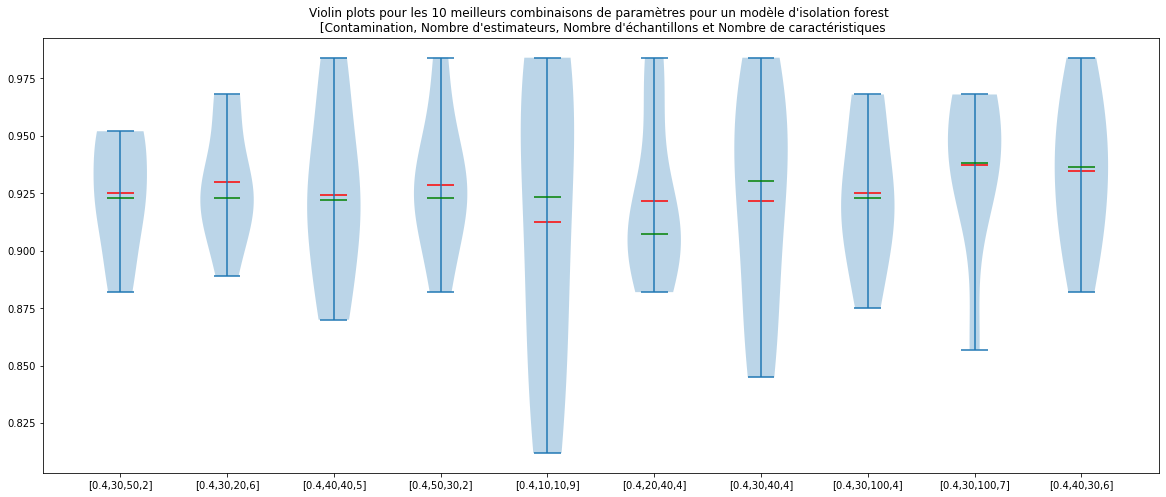

In [37]:
import matplotlib.pyplot as plt
#https://stackabuse.com/matplotlib-violin-plot-tutorial-and-examples/
pos   = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
label = ['[0.4,30,50,2]','[0.4,30,20,6]','[0.4,40,40,5]','[0.4,50,30,2]','[0.4,10,10,9]',\
  '[0.4,20,40,4]','[0.4,30,40,4]','[0.4,30,100,4]','[0.4,30,100,7]','[0.4,40,30,6]']		

fig, ax = plt.subplots(figsize = (20,8))
plot = plt.violinplot(df,showmedians=True, showmeans = True, showextrema = True)
ax.set_xticks(pos)
ax.set_xticklabels(label)
ax.set_title("Violin plots pour les 10 meilleurs combinaisons de paramètres pour un modèle d'isolation forest \n [Contamination, Nombre d'estimateurs, Nombre d'échantillons et Nombre de caractéristiques" )
plot['cmeans'].set_color('r')
plot['cmedians'].set_color('g')
plt.show


In [43]:
# Comparaison modèle LOF et isolation forest sur une des meilleurs combinaisons :
# pour isolation forest : [0.4,30,100,7] 
# pour LOF  : [0.6,manhattan,0.357]
compare_model = pd.DataFrame([], columns = ['IF: [0.4,30,100,7]', 'LOF : [0.6,manhattan,0.357]']) 
compare_model[['IF: [0.4,30,100,7]']] = df[['[0.4,30,100,7]']]
compare_model[['LOF : [0.6,manhattan,0.357]']] = [[0.951], [0.951], [0.918], [0.949], [0.967], [0.967], [0.967], [1.000]]
display(compare_model)
t,p = f_oneway(compare_model[['IF: [0.4,30,100,7]']],compare_model[['LOF : [0.6,manhattan,0.357]']])
print('t statistic: %.3f' % t)
print('p value: %.13f' % p)


,"IF: [0.4,30,100,7]","LOF : [0.6,manhattan,0.357]"
0,0.923,0.951
1,0.938,0.951
2,0.857,0.918
3,0.967,0.949
4,0.938,0.967
5,0.968,0.967
6,0.938,0.967
7,0.968,1.000


t statistic: 1.984
p value: 0.1808337285592


On a p = 0,18 > 0,05 donc il n'y a pas de différence significative. Les ddeux modèles sont donc relativements équivalents.

<function matplotlib.pyplot.show(close=None, block=None)>

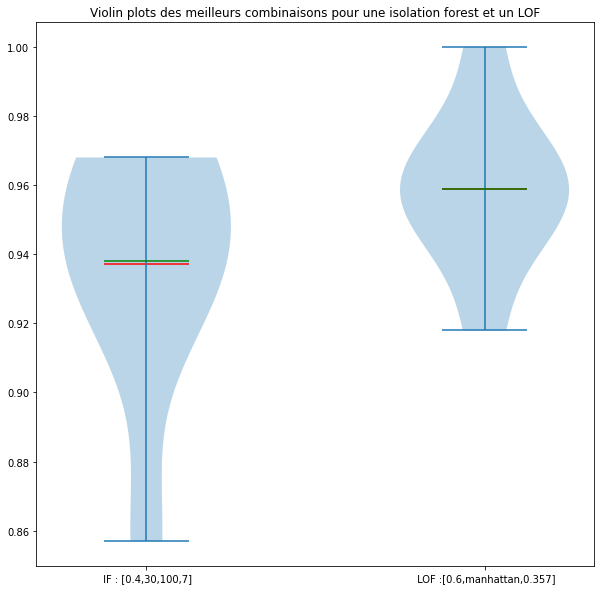

In [42]:

pos   = [1, 2]
label = [' IF : [0.4,30,100,7]',' LOF :[0.6,manhattan,0.357]']		

fig, ax = plt.subplots(figsize = (10,10))
plot = plt.violinplot(compare_model,showmedians=True, showmeans = True, showextrema = True)
ax.set_xticks(pos)
ax.set_xticklabels(label)
ax.set_title("Violin plots des meilleurs combinaisons pour une isolation forest et un LOF")
plot['cmeans'].set_color('r')
plot['cmedians'].set_color('g')
plt.show

In [ ]:
# ValueError: Columns must be same length as key
#https://cumsum.wordpress.com/2021/06/01/pandas-valueerror-columns-must-be-same-length-as-key/

In [17]:
display(df['[0.4,30,100,7]'])

0    0.923
1    0.938
2    0.857
3    0.967
4    0.938
5    0.968
6    0.938
7    0.968
Name: [0.4,30,100,7], dtype: float64